<a href="https://colab.research.google.com/github/12mashok/MusicCognition/blob/main/ImplicitTonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to a Connectionist Model of Tonal Perception

Over the past decades, there has been evidence of implicit tonal knowledge within humans. Experts have theorized that humans gain tonal knowledge through statistical learning [1]. 

In this work, we recreate the first connectionist model implemented in [2] using Minisom. In this paper, two layers of self organising maps (abbreviated to SOMs) were trained on chords that are obtained from the Circle of Fifths. 

The first SOM, called the Chord Layer, is trained on chords obtained from the Circle of Fifths. The Chord Layer learns the different chords present in the circle of fifths. 

The second layer, called the Key Layer, is trained on the outputs of the Chord Layer. While training the Key Layer, the Chord Layer is fed 12 sets of 6 chords, with each set corresponding to a chord belonging to a specific key. 

The paper was able to achieve the Circle of Fifths in the Key Layer.

The self organising maps in this work have been created using [MiniSOM](https://github.com/JustGlowing/minisom/) [3], a minimalistic implementation of self organising maps.




**References:**

[1] C. E. Cancino Chacón, S. Lattner, and M. Grachten, “Developing tonal perception through unsupervised learning,” Proc. 15th Int. Soc. Music Inf. Retr. Conf. ISMIR 2014, pp. 195–200, 2014.

[2] B. Tillmann, J. J. Bharucha, and E. Bigand, “Implicit learning of tonality: A self-organizing approach,” Psychol. Rev., vol. 107, no. 4, pp. 885–913, 2000, doi: 10.1037/0033-295X.107.4.885.

[3] G. Vettigli, “MiniSom: minimalistic and NumPy-based implementation of the Self Organizing Map.” 2018, [Online]. Available: https://github.com/JustGlowing/minisom/.

# Training the Chord Layer

Import required packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show
import matplotlib.pyplot as plt
import pylab as pl

Prior to training the Self Organising Maps, we need to create our input data.

Create dictionaries for the chromatic scale and chords in western music.

In [2]:
chromatic_scale = { 'B#': 0, 'C': 0, 
					'C#': 1, 
					'D': 2, 
					'D#': 3, 
					'E': 4, 
					'E#': 5, 'F': 5, 
					'F#': 6, 
					'G': 7, 
					'G#': 8, 
					'A': 9, 
					'A#': 10, 
					'B': 11 }

chords = {
	'C': "C-E-G",
	'C#': "C#-E#-G#", 
	'D': "D-F#-A",
	'D#': "D#-G-A#", 
	'E': "E-G#-B",
	'E#': "E#-A-B#", 
	'F#': "F#-A#-C#", 
	'G': "G-B-D",
	'G#': "G#-B#-D#",
	'A': "A-C#-E",
	'A#': "A#-D-F",
	'B': "B-D#-F#",
	'c': "C-D#-G",
	'c#': "C#-E-G#", 
	'd': "D-F-A",
	'd#': "D#-F#-A#", 
	'e': "E-G-B",
	'e#': "E#-G#-B#", 
	'f#': "F#-A-C#", 
	'g': "G-A#-D",
	'g#': "G#-B-D#",
	'a': "A-C-E",
	'a#': "A#-C#-F", 
	'b': "B-D-F#"
}

Each input is a 1x12 vector representing a chord, with elements of the vector corresponding to [C, C#, D, D#, E, F, F#, G, G#, A, A#, B]. To represent a chord, the elements corresponding to the notes present in the chord is set to 1, and the rest is set to 0. 

For example, the C chord is made up by C, E, and G. The input for the C chord would be: [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0 ,0]

The sparse_inputs_gen function generates the input vector for each chord. 

In [3]:
chords_input = list(chords.values())
chord_labels = list(chords.keys())

def sparse_inputs_gen(chord_input):
	output = np.zeros([12], dtype=int)
	for note in chord_input.split('-'):
		output[chromatic_scale[note]] = 1

	return output

X_chords = [sparse_inputs_gen(chord) for chord in chords_input]


We're now ready to train the first SOM, which is the chord layer! We use MiniSom to initialise and train the SOM. 

The paramters chosen for the SOM has been optimised based on quantisation and topological errors.

In [4]:
chord_som = MiniSom(x=6, y=6, input_len= 12, sigma= 1, learning_rate = 1.1)
chord_som.random_weights_init(X_chords)
chord_som.train(data = X_chords, num_iteration = 1000, random_order=True, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.4372623226134083


To visualize the Chord Layer, the plotSOM function is created. The plotSOM implementation is an appended version of the visualisation in the [basic usage](https://github.com/JustGlowing/minisom/blob/master/examples/BasicUsage.ipynb) listed in the MiniSom github examples.

In [5]:
def plotSOM(som, data, labels):
	plt.figure()
	bone()
	pcolor(som.distance_map().T, cmap='bone_r')
	colorbar()

	label_plots = {}
	print('Self Organising Map')
	for i, x in enumerate(data):
		# print(i, x)
		w = som.winner(x)

		# Print stats of winning neuron for each input 
		# plot graph
		plt.plot(w[0] + 0.5,
	         w[1] + 0.5,
	         markerfacecolor = 'None',
	         markersize = 10,
	         markeredgewidth = 2)
		if w in label_plots:
			label_plots[w] += ','+ labels[i]
		else: 
			label_plots[w] = labels[i]
	
	for labels in label_plots.items():
		pl.text(labels[0][0]+.5,  labels[0][1]+.5, labels[1] , weight='bold', color='red', fontsize=12)


The Chord Layer can now be visualised! 

Self Organising Map


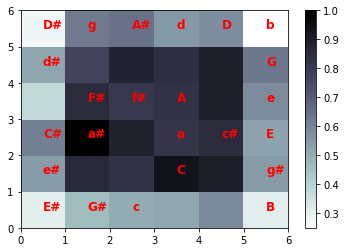

In [6]:
plotSOM(chord_som, X_chords, chord_labels)

# Training the Key Layer

We now move onto training the second SOM, which is the key layer. 
As discussed in the introduction, the chord layer is fed 12 combinations of 6 chords, each combination belonging to the chords in a specific key. 
The Key Layer SOM is trained on the outputs of the chord layer.

The inputs for training the key layer is collected as shown below

In [7]:
# from http://www.piano-keyboard-guide.com/chords-by-key.html
triad_major_scales = {
	'C': ['C', 'd', 'e', 'F', 'G', 'a'], 
	'C#': ['C#', 'd#', 'e#', 'F#', 'G#', 'A#'],
	'D': ['D',  'e', 'f#', 'G', 'A', 'b'], 
	'Eb': ['Eb', 'f', 'g', 'Ab', 'Bb', 'c'], 
	'E': ['E', 'f#', 'g#', 'A', 'B', 'c#'], 
	'F': ['F', 'g', 'a', 'Bb', 'C', 'd'], 
	'F#': ['F#', 'g#', 'a#', 'B', 'C#', 'd#'], 
	'G': ['G', 'a', 'b', 'C', 'D', 'e'], 
	'Ab': ['Ab', 'bb', 'c', 'Db', 'Eb', 'f'],  
	'A': ['A', 'b', 'c#', 'D', 'E', 'f#'], 
	'Bb': ['Bb', 'c', 'd', 'Eb', 'F', 'g'],
	'B': ['B', 'c#', 'd#', 'E', 'F#', 'g#']    
}

chords = {
	'C': "C-E-G",
	'C#': "C#-E#-G#", 'Db': "C#-E#-G#",
	'D': "D-F#-A",
	'D#': "D#-G-A#", 'Eb': "D#-G-A#",
	'E': "E-G#-B",
	'E#': "E#-A-B#", 'F': "F-A-C",
	'F#': "F#-A#-C#", 'Gb': "F#-A#-C#",
	'G': "G-B-D",
	'G#': "G#-B#-D#",'Ab': "G#-B#-D#",
	'A': "A-C#-E",
	'A#': "A#-D-F", 'Bb': "A#-D-F",
	'B': "B-D#-F#",
	'c': "C-D#-G",
	'c#': "C#-E-G#", 'db': "C#-E-G#",
	'd': "D-F-A",
	'd#': "D#-F#-A#", 'eb': "D#-F#-A#",
	'e': "E-G-B",
	'e#': "E#-G#-B#", 'f': "F-G#-C",
	'f#': "F#-A-C#", 'gb': "F#-A-C#",
	'g': "G-A#-D",
	'g#': "G#-B-D#", 'ab': "G#-B-D#",
	'a': "A-C-E",
	'a#': "A#-C#-F", 'bb': "A#-C#-F",
	'b': "B-D-F#"
}

key_labels = list(triad_major_scales.keys())
X_keys = []
for key_chords in triad_major_scales.values():
  unwrapped_output = [0]*36
  for chord in key_chords: 
    chord_som_input = sparse_inputs_gen(chords[chord])
    pos = chord_som.winner(chord_som_input) #extract position of winning neuron
    position_in_input = (pos[0]-1)*6+pos[1] #based on (i-1)*n + j, where i, j is position of element and n is the number of columns
    unwrapped_output[position_in_input] = 1

	#append to inputs for training key layer
  X_keys.append(unwrapped_output)


With the inputs and labels collected, we're ready to train the key layer SOM

In [8]:
key_som = MiniSom(x = 4, y = 4, input_len = 36, sigma = 1, learning_rate = 1)
key_som.random_weights_init(X_keys)
key_som.train(data = X_keys, num_iteration=800, random_order=True, verbose=True)

 [ 800 / 800 ] 100% - 0:00:00 left 
 quantization error: 0.5942015024898792


Visualise the key layer SOM

Self Organising Map


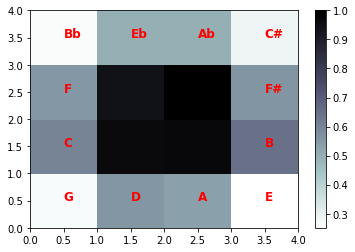

In [9]:
plotSOM(key_som, X_keys, key_labels)

If you retrain the Key Layer a few times, you will notice that the Circle of Fifths is not always perfectly achieved. 

What determines whether the Circle of Fifths is perfectly achieved? Play around with the SOM training parameters to find out!





We're currently working on further analysing the SOMs produced here, and expanding this implementation to other algorithms. Come back at a later time to see our progress! 